In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print(sns.__version__)

0.10.1


In [240]:
# プロット用データの作成
titanic = sns.load_dataset("titanic") ##kaggleで有名な、タイタニック号の生死者データ
tips = sns.load_dataset("tips")  ## お店の食事時間と会計総額とチップの関係のデータ
iris = sns.load_dataset("iris")  ## Rでお馴染みのアヤメの統計データ
anscombe = sns.load_dataset("anscombe")
fmri = sns.load_dataset("fmri")

# matplotlibオブジェクト

In [ ]:
"""
・seabornのプロット関数はfigureレベルとaxesレベルの2種類に分けられる。
・***Gridオブジェクト：figureレベル関数の返り値。複数のグラフを扱うためのオブジェクト。
[figure関数]    [返り値]
catplot    ->  FacetGrid  # いろいろ
jointplot  ->  JointGrid  # 密度分布
pairplot   ->  PairGrid   # 散布図行列
lmplot     ->  FacetGrid  # 回帰用
relplot    ->  FacetGrid  # lmplotの低レベルversion
clustermap ->  ClusterGrid
"""

<class 'seaborn.axisgrid.FacetGrid'>
<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
<class 'list'>
True


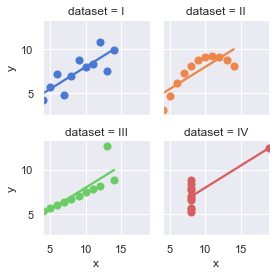

In [259]:
"""figureレベル関数について"""
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})

print(type(grid))  # <class 'seaborn.axisgrid.FacetGrid'>
print(type(grid.fig))  # <class 'matplotlib.figure.Figure'>

print(type(grid.axes))  # <class 'numpy.ndarray'>
print(type(grid.fig.axes))  # <class 'list'>

print(id(grid.fig.axes[0]) == id(grid.axes[0]))  # True

<class 'matplotlib.axes._subplots.AxesSubplot'>
True
True


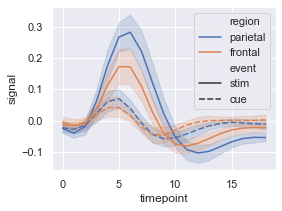

In [313]:
"""axesレベル関数について"""
plt.figure(figsize=(4, 3))
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="region", style="event",
                  data=fmri)
print(type(ax))  # <class 'matplotlib.axes._subplots.AxesSubplot'>
print(id(ax) == id(plt.gca()))  # True
print(id(ax.figure) == id(plt.gcf()))  # True

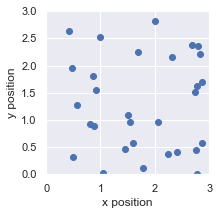

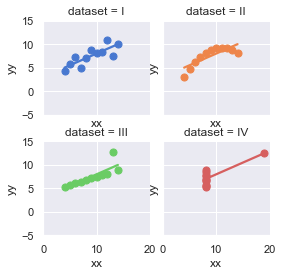

In [261]:
"""FacetGrid、PairGrid、ClusterGridで使える共通のsetメソッド"""
# matplotlibの例
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.scatter(3*np.random.rand(30), 3*np.random.rand(30))
#
ax.set(ylim=(0,3), ylabel='y position', xlim=(0,3), xlabel='x position', aspect='equal')
# 上記は以下と同じ
# ax.set_ylim((0,3))
# ax.set_ylabel('y position')
# ax.set_xlim((0,3))
# ax.set_xlabel('x position')
# ax.set_aspect('equal')

# seabornでの設定例
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})
grid.set(xlabel='xx', ylabel='yy')  # ->すべてのAxesに対しいて適用されてしまうので使用ないほうがいい
grid.set(ylim=(-5,15), xlim=(0,20))

## FacetGridだけの設定例

In [307]:
"""FacetGridだけのメソッド
[メソッド] [説明]
set_axis_labels([x_var, y_var])    ：左端と下端のラベルを設定
set_xlabels([label])               ：下端のラベルのみ設定
set_ylabels([label])               ：左端のラベルのみ設定
set_titles([template, row_template, …])
                                   ：全てのAxesの上部またはグリッド上部や右側に列や行のカテゴリや
                                   　値を示すタイトルを設定
set_xticklabels([labels, step])    ：下端の数字ラベルを設定
set_yticklabels([labels])          ：左端の数字ラベルを設定
"""

'FacetGridだけのメソッド\n[メソッド] [説明]\nset_axis_labels([x_var, y_var])    ：左端と下端のラベルを設定\nset_xlabels([label])               ：下端のラベルのみ設定\nset_ylabels([label])               ：左端のラベルのみ設定\nset_titles([template, row_template, …])\n                                   ：全てのAxesの上部またはグリッド上部や右側に列や行のカテゴリや\n                                   \u3000値を示すタイトルを設定\nset_xticklabels([labels, step])    ：下端の数字ラベルを設定\nset_yticklabels([labels])          ：左端の数字ラベルを設定\n'

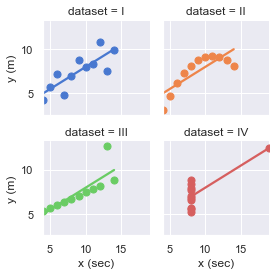

In [300]:
"""FacetGridだけのメソッド
set_*labels, set_axis_labelsの例
"""
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})
grid.set_xlabels('x (sec)').set_ylabels('y (m)')
# grid.set_axis_labels(x_var="x (sec)", y_var="y (m)")  # これでもいい

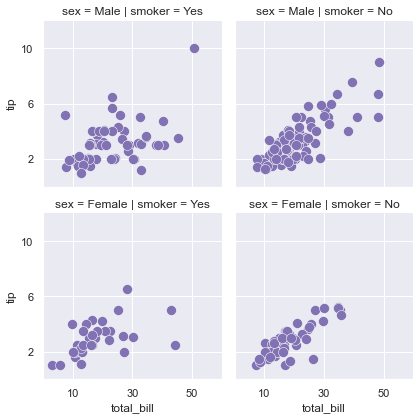

In [301]:
"""FacetGridだけのメソッド
set_titlesの設定1(デフォルト)
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

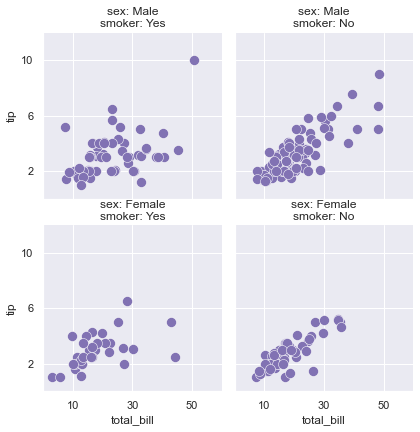

In [302]:
"""FacetGridだけのメソッド
set_titlesの設定例1
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.set_titles(template='{row_var}: {row_name}\n{col_var}: {col_name}')

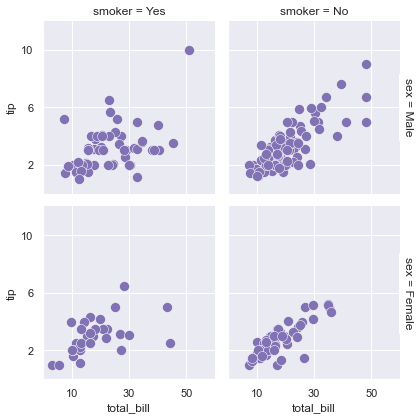

In [303]:
"""FacetGridだけのメソッド
set_titlesの設定2(デフォルト)
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="smoker", row="sex", margin_titles=True)  # ->Trueにする
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

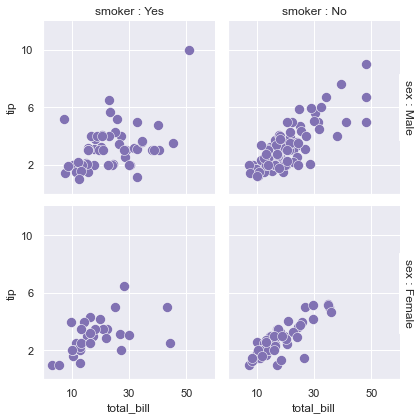

In [306]:
"""FacetGridだけのメソッド
set_titlesの設定例2
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="smoker", row="sex", margin_titles=True)  # ->Trueにする
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.set_titles(row_template='{row_var} : {row_name}', col_template='{col_var} : {col_name}')

## JointGridだけの設定例

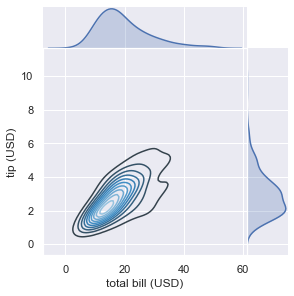

In [309]:
"""JointGridだけのメソッド
set_axis_labelsの設定例
"""
g = sns.JointGrid(x="total_bill", y="tip", data=tips, space=0)
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.kdeplot, shade=True)
g.fig.set_size_inches((4,4))
g.set_axis_labels('total bill (USD)', 'tip (USD)')

# 画像サイズの設定

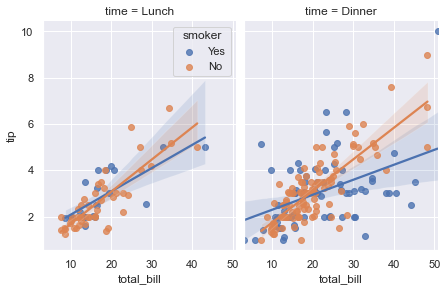

In [325]:
"""figureレベル関数で設定する場合1"""
grid = sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
                  data=tips, legend_out=False)
grid.fig.set_size_inches((6, 4))  # ->各plotサイズの設定になる

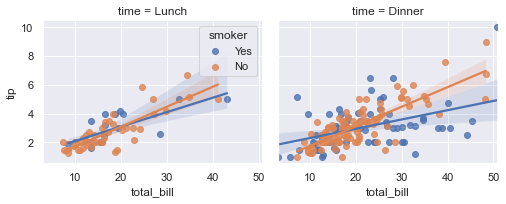

In [326]:
"""figureレベル関数で設定する場合2"""
grid = sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
                  data=tips, legend_out=False, height=3, aspect=1.2)  # ->各plotサイズの設定になる

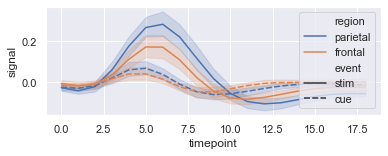

In [339]:
"""axesレベル関数で設定する場合
axを渡す場合
"""
fig, ax = plt.subplots(figsize=(6, 2))  # ->Figure全体のサイズ設定になる
sns.lineplot(x="timepoint", y="signal", hue="region", style="event",data=fmri, ax=ax)

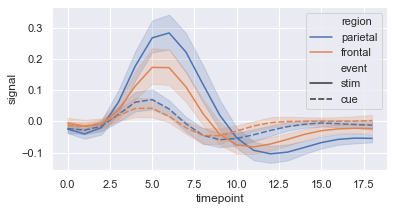

In [340]:
"""axesレベル関数で設定する場合
axを渡さない場合
"""
plt.figure(figsize=(6, 3))  # ->Figure全体のサイズ設定になる
ax = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

# タイトルと軸ラベルの設定

In [341]:
"""
FacetGridでは設定に制限がある。
matplotlibのFigureやAxesにアクセスすれば、自由に設定可能。
"""

'\nFacetGridでは設定に制限がある。\nmatplotlibのFigureやAxesにアクセスすれば、自由に設定可能。\n'

AxesSubplot(0.169132,0.161319;0.370434x0.325729)
AxesSubplot(0.584566,0.161319;0.370434x0.325729)


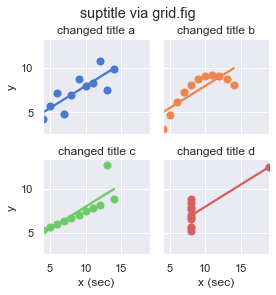

In [360]:
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})
grid.fig.suptitle('suptitle via grid.fig', y=1.02)  # 図全体のタイトル

for ax, title in zip(grid.axes.tolist(), ['a', 'b', 'c', 'd']):
    ax.set_title(f'changed title {title}')

for ax in grid._bottom_axes: # 下端のAxesだけにアクセスできるプライベート変数を使う場合
    ax.set_xlabel("x (sec)")
for ax in grid.axes[2:]:  # axesを直接指定して設定
    print(ax)

Text(0, 0.5, 'ylabel')

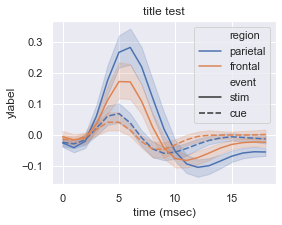

In [359]:
"""axを渡す場合はaxに直接指定できる"""
plt.figure(figsize=(4, 3))
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="region", style="event",
                  data=fmri)
ax.set_title("title test")
ax.set_xlabel("time (msec)")
ax.set_ylabel("ylabel")

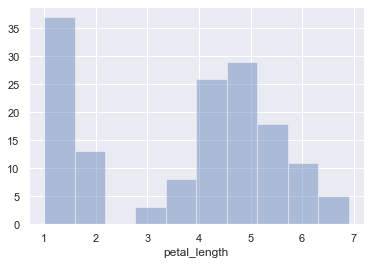

In [192]:
"""ヒストグラム
"""
sns.distplot(iris["petal_length"], kde=False, rug=False, bins=10, label="test")

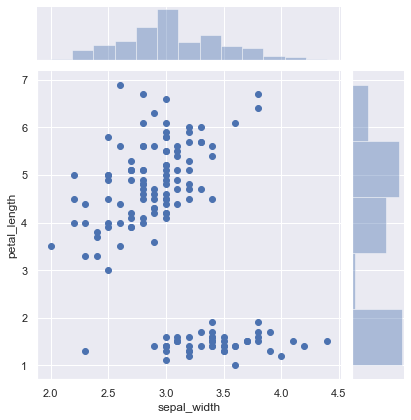

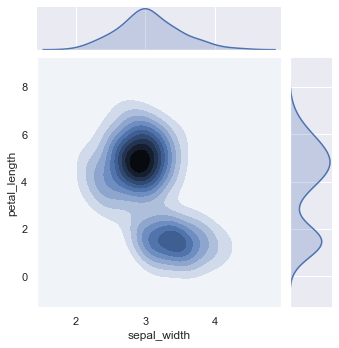

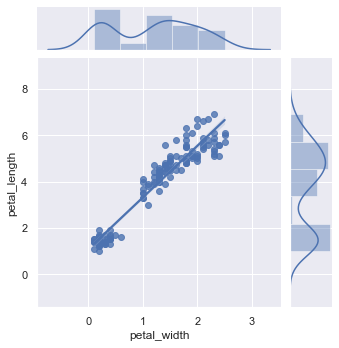

In [210]:
"""散布図
"""
sns.jointplot('sepal_width', 'petal_length', data=iris)
sns.jointplot('sepal_width', 'petal_length', data=iris, kind="kde", height=5.0)
sns.jointplot('petal_width', 'petal_length', data=iris, kind="reg", height=5.0)

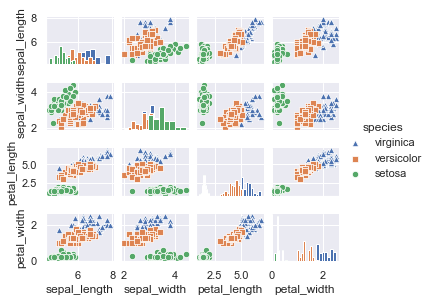

In [219]:
"""散布図行列
hue          ：表示種別の指定。
hue_order    ：hueの順番
kind         ：プロット種類。‘scatter’, ‘reg’から選択。
diag_kind    ：対角表示の設定。‘auto’, ‘hist’, ‘kde’から選択。
vars         ：グラフ化する行列を指定。x_vars, y_varsと共存できない。
"""
pg = sns.pairplot(iris, 
                  dropna=True,  # 欠損値の排除
                  markers=["^", "s", "o"], 
                  hue="species", 
                  hue_order=['virginica', 'versicolor', 'setosa'], 
                  kind="scatter", 
                  diag_kind="hist", 
#                   vars=['sepal_length','sepal_width'], 
#                   x_vars=["sepal_width", "sepal_length"], 
#                   y_vars=["petal_width", "petal_length"], 
#                   palette='Greys',  # カラーパレットの指定
                  height=1.,  # 縦幅(インチ)
                  aspect=1.2,  # 横幅(=height*aspect)
                  plot_kws=dict(s=40, alpha=1.0),  # 
                 )

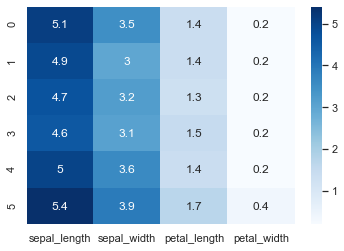

In [195]:
sns.heatmap(iris.drop("species", axis=1).iloc[0:6], annot=True, fmt='g', cmap='Blues')

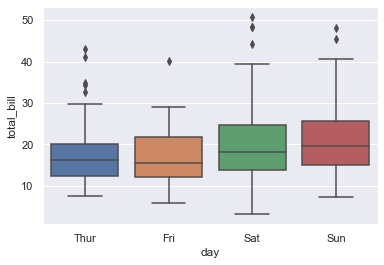

In [128]:
"""箱ひげプロット
"""
ax = sns.boxplot(x="day", y="total_bill", data=tips.sort_values('size'))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# sns.set_palette(flatui)

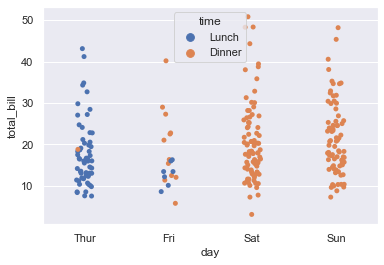

In [71]:
"""分布プロット
"""
sns.stripplot(x="day", y="total_bill", data=tips, hue='time')

In [ ]:
"""折れ線プロット
"""

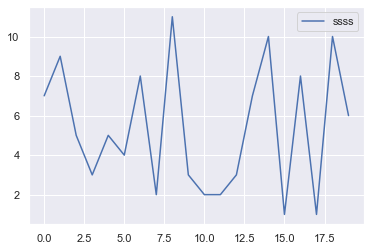

In [117]:
fig = sns.mpl.pyplot.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(20),  [np.random.randint(0, 12) for i in range(20)], label="ssss")
ax.legend()
plt.show()